In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
raw_data = pd.read_csv("fifa21_male2.csv")
raw_data.head()

/var/folders/7c/c36qrzr96cj9wm_593g20t8000w3sp/T/ipykernel_2935/1306355288.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv("fifa21_male2.csv")


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [4]:
pd.options.display.max_columns = None
raw_data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [5]:
raw_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 107 columns):
 #    Column            Dtype  
---   ------            -----  
 0    ID                int64  
 1    Name              object 
 2    Age               int64  
 3    OVA               int64  
 4    Nationality       object 
 5    Club              object 
 6    BOV               int64  
 7    BP                object 
 8    Position          object 
 9    Player Photo      object 
 10   Club Logo         object 
 11   Flag Photo        object 
 12   POT               int64  
 13   Team & Contract   object 
 14   Height            object 
 15   Weight            object 
 16   foot              object 
 17   Growth            int64  
 18   Joined            object 
 19   Loan Date End     object 
 20   Value             object 
 21   Wage              object 
 22   Release Clause    object 
 23   Contract          object 
 24   Attacking         int64  
 25   Crossing          in

In [6]:
#standardising column names
raw_data.columns = [name.lower().replace(" ", "_") for name in raw_data.columns]
raw_data.head()

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [7]:
# converting measurements to numerical variables 
# we have to change the columns 14, 15, 20-22 "height", "weight", "value", "wage", "clause"

raw_data['height_cm'] = raw_data['height'].apply(lambda x: int(x.split("'")[0]) * 30.48 + int(x.split("'")[1].replace('"', '')) * 2.54)
raw_data['weight_kg'] = raw_data['weight'].apply(lambda x: int(x.replace('lbs', '')) / 2.205)

raw_data = raw_data.drop(["height", "weight"], axis=1)

raw_data.head()

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,height_cm,weight_kg
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,182.88,82.086168
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male,177.80,64.852608
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male,175.26,73.015873
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male,180.34,74.829932
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male,170.18,68.027211


### Dealing with Empty Values

In [8]:
#creating the list of columns for numericals and non numericals
num_cols = raw_data.select_dtypes(include=['float64', 'int64']).columns
non_num_cols = raw_data.select_dtypes(exclude=['float64', 'int64']).columns

In [9]:
#filling empty values with the mean for the numeric ones
raw_data[num_cols] = raw_data[num_cols].fillna(raw_data[num_cols].mean())

In [10]:
#filling empty values with mode with non numeric
for col in non_num_cols:
    raw_data[col].fillna(raw_data[col].mode()[0], inplace=True)

### Cleaning up club / contract info

In [11]:
#Jesus: here I am splitting the contract column into two columns "contract_start", "contract_end"
raw_data[['contract_start', 'contract_end']] = raw_data['contract'].str.split(' ~ ', expand=True)

raw_data['contract_end'].fillna(value=np.nan, inplace=True)

raw_data.drop(['contract', 'team_&_contract'], axis=1, inplace=True)

print(raw_data.loc[:, ['contract_start', 'contract_end']])

             contract_start contract_end
0                      2008         2016
1                      2014         2019
2                      2016         2020
3                      2009          NaN
4                      2018         2021
...                     ...          ...
17120  Jun 30, 2021 On Loan          NaN
17121                  2020         2021
17122                  2020         2022
17123                  2020         2023
17124                  2020         2024

[17125 rows x 2 columns]


In [12]:
#Jesus: here I am looking for values that are not years in "contract_start", "contract_end" to understand how many invalid values we have
pattern = r'^\d{4}$'

raw_data['contract_end'] = raw_data['contract_end'].astype(str)

start_count = raw_data[~raw_data['contract_start'].str.contains(pattern)].shape[0]
end_count = raw_data[~raw_data['contract_end'].str.contains(pattern)].shape[0]

print(f"Rows with non-year format in contract_start: {start_count}")
print(f"Rows with non-year format in contract_end: {end_count}")

Rows with non-year format in contract_start: 1423
Rows with non-year format in contract_end: 1300


In [13]:
#Jesus: here I am dropping invalid values in "contract_start", "contract_end"
pattern = r'^\d{4}$'

raw_data['contract_end'] = raw_data['contract_end'].astype(str)

mask = ~(raw_data['contract_start'].str.contains(pattern)) | ~(raw_data['contract_end'].str.contains(pattern))

raw_data = raw_data.drop(index=raw_data[mask].index)

print(raw_data.loc[:, ['contract_start', 'contract_end']])

      contract_start contract_end
0               2008         2016
1               2014         2019
2               2016         2020
4               2018         2021
5               2011         2012
...              ...          ...
17119           2020         2022
17121           2020         2021
17122           2020         2022
17123           2020         2023
17124           2020         2024

[15654 rows x 2 columns]


In [14]:
#Jesus: here I am converting 'contract_start' and 'contract_end' to int
raw_data['contract_start'] = pd.to_numeric(raw_data['contract_start'])
raw_data['contract_end'] = pd.to_numeric(raw_data['contract_end'])

print(raw_data.loc[:, ['contract_start', 'contract_end']])

       contract_start  contract_end
0                2008          2016
1                2014          2019
2                2016          2020
4                2018          2021
5                2011          2012
...               ...           ...
17119            2020          2022
17121            2020          2021
17122            2020          2022
17123            2020          2023
17124            2020          2024

[15654 rows x 2 columns]


### Removing Columns

In [15]:
raw_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15654 entries, 0 to 17124
Data columns (total 107 columns):
 #    Column            Dtype  
---   ------            -----  
 0    id                int64  
 1    name              object 
 2    age               int64  
 3    ova               int64  
 4    nationality       object 
 5    club              object 
 6    bov               int64  
 7    bp                object 
 8    position          object 
 9    player_photo      object 
 10   club_logo         object 
 11   flag_photo        object 
 12   pot               int64  
 13   foot              object 
 14   growth            int64  
 15   joined            object 
 16   loan_date_end     object 
 17   value             object 
 18   wage              object 
 19   release_clause    object 
 20   attacking         int64  
 21   crossing          int64  
 22   finishing         int64  
 23   heading_accuracy  int64  
 24   short_passing     int64  
 25   volleys           fl

In [16]:
#deleting other useless columns
raw_data =raw_data.drop(columns = ["player_photo" , "club_logo","flag_photo", "gender","id", "w/f", "sm", "ir"])
raw_data

,name,age,ova,nationality,club,bov,bp,position,pot,foot,growth,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,height_cm,weight_kg,contract_start,contract_end
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Left,0,"Jul 1, 2008","Jun 30, 2021",€625K,€7K,€0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,59.940965,208,70,69,69.0,56,14,5,15,10,12,1929,408,Medium,High,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,182.88,82.086168,2008,2016
1,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,Right,0,"Jul 19, 2014","Jun 30, 2021",€600K,€7K,€1.1M,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.000000,153,70,43,40.0,56,9,12,13,11,11,1906,385,Medium,Medium,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,177.80,64.852608,2014,2019
2,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Right,0,"Jan 7, 2016","Jun 30, 2021",€1.1M,€15K,€0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,59.940965,99,35,34,30.0,51,9,6,13,16,7,1770,354,Medium,Low,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,175.26,73.015873,2016,2020
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Right,0,"Jul 16, 2018","Jun 30, 2021",€5.5M,€12K,€7.2M,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.000000,181,68,57,56.0,45,6,13,6,13,7,2014,420,High,Medium,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,170.18,68.027211,2018,2021
5,D. Odonkor,27,66,Germany,Alemannia Aachen,66,RW,RW RM,70,Right,4,"Jan 1, 2011","Jun 30, 2021",€725K,€5K,€0,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,59.940965,79,22,26,31.0,46,8,13,7,9,9,1649,360,Medium,Medium,91,56,56,67,27,63,7,62+0,62+0,62+0,66+0,62+0,62+0,62+0,66+0,62+0,62+0,62+0,64+0,54+0,54+0,54+0,64+0,50+0,47+0,47+0,47+0,50+0,46+0,41+0,41+0,41+0,46+0,13+0,172.72,73.922902,2011,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,F. Tapia,19,60,Mexico,Club América,60,GK,GK,72,Right,12,"Jul 1, 2020","Jun 30, 2021",€300K,€2K,€570K,67,12,8,16,23,8.0,78,9,11.0,15,29,14,173,22,26,30.0,45,50.0,197,45,60.0,30,55,7,122,21,7.0,6.0,55.0,33,40.000000,81,50,15,16.0,305,60,61,60,59,65,1023,329,Medium,Medium,60,61,60,65,24,59,9,20+2,20+2,20+2,19+0,21+0,21+0,21+0,19+0,23+2,23+2,23+2,21+2,25+2,25+2,25+2,21+2,22+2,26+2,26+2,26+2,22+2,22+2,27+2,27+2,27+2,22+2,59+2,185.42,78.911565,2020,2022
17121,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,66,Right,10,"Aug 20, 20

### Cleaning up scores in different positions

In [17]:
raw_data.head()

,name,age,ova,nationality,club,bov,bp,position,pot,foot,growth,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,height_cm,weight_kg,contract_start,contract_end
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Left,0,"Jul 1, 2008","Jun 30, 2021",€625K,€7K,€0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,59.940965,208,70,69,69.0,56,14,5,15,10,12,1929,408,Medium,High,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,182.88,82.086168,2008,2016
1,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,Right,0,"Jul 19, 2014","Jun 30, 2021",€600K,€7K,€1.1M,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.000000,153,70,43,40.0,56,9,12,13,11,11,1906,385,Medium,Medium,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,177.80,64.852608,2014,2019
2,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Right,0,"Jan 7, 2016","Jun 30, 2021",€1.1M,€15K,€0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,59.940965,99,35,34,30.0,51,9,6,13,16,7,1770,354,Medium,Low,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,175.26,73.015873,2016,2020
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Right,0,"Jul 16, 2018","Jun 30, 2021",€5.5M,€12K,€7.2M,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.000000,181,68,57,56.0,45,6,13,6,13,7,2014,420,High,Medium,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,170.18,68.027211,2018,2021
5,D. Odonkor,27,66,Germany,Alemannia Aachen,66,RW,RW RM,70,Right,4,"Jan 1, 2011","Jun 30, 2021",€725K,€5K,€0,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,59.940965,79,22,26,31.0,46,8,13,7,9,9,1649,360,Medium,Medium,91,56,56,67,27,63,7,62+0,62+0,62+0,66+0,62+0,62+0,62+0,66+0,62+0,62+0,62+0,64+0,54+0,54+0,54+0,64+0,50+0,47+0,47+0,47+0,50+0,46+0,41+0,41+0,41+0,46+0,13+0,172.72,73.922902,2011,2012


In [18]:
#we define a new working df with the columns we want to edit
working_data = raw_data.loc[:, ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']]
print(working_data.shape)

(15654, 27)


In [19]:
#here we split the strings by the +- signs after a number, convert the left columns to a number and then apply the operation
working_data = working_data.astype(str)

for col in working_data.columns:
    split_values = working_data[col].str.split(pat=r'[+-]', expand=False)
    working_data[col] = pd.to_numeric(split_values.str[0])
    working_data[col] *= split_values.str[1].apply(lambda x: -1 if x == '-' else 1)

working_data.head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17
1,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17
2,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15
4,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17
5,62,62,62,66,62,62,62,66,62,62,62,64,54,54,54,64,50,47,47,47,50,46,41,41,41,46,13


In [20]:
#here we update the values of working_data into raw_data
raw_data.update(working_data)
raw_data.head()

,name,age,ova,nationality,club,bov,bp,position,pot,foot,growth,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,height_cm,weight_kg,contract_start,contract_end
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Left,0,"Jul 1, 2008","Jun 30, 2021",€625K,€7K,€0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,59.940965,208,70,69,69.0,56,14,5,15,10,12,1929,408,Medium,High,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,182.88,82.086168,2008,2016
1,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,Right,0,"Jul 19, 2014","Jun 30, 2021",€600K,€7K,€1.1M,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.000000,153,70,43,40.0,56,9,12,13,11,11,1906,385,Medium,Medium,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,177.80,64.852608,2014,2019
2,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Right,0,"Jan 7, 2016","Jun 30, 2021",€1.1M,€15K,€0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,59.940965,99,35,34,30.0,51,9,6,13,16,7,1770,354,Medium,Low,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,175.26,73.015873,2016,2020
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Right,0,"Jul 16, 2018","Jun 30, 2021",€5.5M,€12K,€7.2M,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.000000,181,68,57,56.0,45,6,13,6,13,7,2014,420,High,Medium,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,170.18,68.027211,2018,2021
5,D. Odonkor,27,66,Germany,Alemannia Aachen,66,RW,RW RM,70,Right,4,"Jan 1, 2011","Jun 30, 2021",€725K,€5K,€0,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,59.940965,79,22,26,31.0,46,8,13,7,9,9,1649,360,Medium,Medium,91,56,56,67,27,63,7,62,62,62,66,62,62,62,66,62,62,62,64,54,54,54,64,50,47,47,47,50,46,41,41,41,46,13,172.72,73.922902,2011,2012


In [21]:
#here I am converting these to numeric + Hits
int_cols = ['hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

for col in int_cols:
    raw_data[col] = pd.to_numeric(raw_data[col], errors='coerce').astype('Int64')

raw_data = raw_data.dropna(subset=int_cols, how='any')

### Formatting dates

In [22]:
print(raw_data['loan_date_end'].isna().sum())
raw_data['loan_date_end'] = pd.to_datetime(raw_data['loan_date_end'], format='%b %d, %Y')

print(raw_data['joined'].isna().sum())
raw_data['joined'] = pd.to_datetime(raw_data['joined'], format='%b %d, %Y')

raw_data.head()

0
0


/var/folders/7c/c36qrzr96cj9wm_593g20t8000w3sp/T/ipykernel_2935/1476398623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['loan_date_end'] = pd.to_datetime(raw_data['loan_date_end'], format='%b %d, %Y')
/var/folders/7c/c36qrzr96cj9wm_593g20t8000w3sp/T/ipykernel_2935/1476398623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['joined'] = pd.to_datetime(raw_data['joined'], format='%b %d, %Y')


,name,age,ova,nationality,club,bov,bp,position,pot,foot,growth,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,height_cm,weight_kg,contract_start,contract_end
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Left,0,2008-07-01,2021-06-30,€625K,€7K,€0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,59.940965,208,70,69,69.0,56,14,5,15,10,12,1929,408,Medium,High,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,182.88,82.086168,2008,2016
1,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,Right,0,2014-07-19,2021-06-30,€600K,€7K,€1.1M,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.000000,153,70,43,40.0,56,9,12,13,11,11,1906,385,Medium,Medium,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,177.80,64.852608,2014,2019
2,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Right,0,2016-01-07,2021-06-30,€1.1M,€15K,€0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,59.940965,99,35,34,30.0,51,9,6,13,16,7,1770,354,Medium,Low,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,175.26,73.015873,2016,2020
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Right,0,2018-07-16,2021-06-30,€5.5M,€12K,€7.2M,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.000000,181,68,57,56.0,45,6,13,6,13,7,2014,420,High,Medium,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,170.18,68.027211,2018,2021
5,D. Odonkor,27,66,Germany,Alemannia Aachen,66,RW,RW RM,70,Right,4,2011-01-01,2021-06-30,€725K,€5K,€0,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,59.940965,79,22,26,31.0,46,8,13,7,9,9,1649,360,Medium,Medium,91,56,56,67,27,63,7,62,62,62,66,62,62,62,66,62,62,62,64,54,54,54,64,50,47,47,47,50,46,41,41,41,46,13,172.72,73.922902,2011,2012


### Dealing with secondary positions

In [23]:
split_positions = raw_data['position'].str.split(expand=True)
split_positions = split_positions.add_prefix('secondary_position_')
raw_data = pd.concat([raw_data, split_positions], axis=1)
raw_data = raw_data.drop('position', axis=1)

raw_data.head()

,name,age,ova,nationality,club,bov,bp,pot,foot,growth,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,height_cm,weight_kg,contract_start,contract_end,secondary_position_0,secondary_position_1,secondary_position_2,secondary_position_3
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,Left,0,2008-07-01,2021-06-30,€625K,€7K,€0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,59.940965,208,70,69,69.0,56,14,5,15,10,12,1929,408,Medium,High,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,182.88,82.086168,2008,2016,LM,None,None,None
1,Luis García,37,71,Spain,KAS Eupen,70,CM,71,Right,0,2014-07-19,2021-06-30,€600K,€7K,€1.1M,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.000000,153,70,43,40.0,56,9,12,13,11,11,1906,385,Medium,Medium,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,177.80,64.852608,2014,2019,CM,CAM,CDM,None
2,J. Cole,33,71,England,Coventry City,71,CAM,71,Right,0,2016-01-07,2021-06-30,€1.1M,€15K,€0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,59.940965,99,35,34,30.0,51,9,6,13,16,7,1770,354,Medium,Low,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,175.26,73.015873,2016,2020,CAM,RM,RW,LM
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,Right,0,2018-07-16,2021-06-30,€5.5M,€12K,€7.2M,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.000000,181,68,57,56.0,45,6,13,6,13,7,2014,420,High,Medium,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,170.18,68.027211,2018,2021,CM,CAM,None,None
5,D. Odonkor,27,66,Germany,Alemannia Aachen,66,RW,70,Right,4,2011-01-01,2021-06-30,€725K,€5K,€0,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,59.940965,79,22,26,31.0,46,8,13,7,9,9,1649,360,Medium,Medium,91,56,56,67,27,63,7,62,62,62,66,62,62,62,66,62,62,62,64,54,54,54,64,50,47,47,47,50,46,41,41,41,46,13,172.72,73.922902,2011,2012,RW,RM,None,None


### Converting a/w and d/w and foot into numericals

In [24]:
raw_data['a/w'] = raw_data['a/w'].replace({'Low': 1, 'Medium': 2, 'High': 3})
raw_data['d/w'] = raw_data['d/w'].replace({'Low': 1, 'Medium': 2, 'High': 3})
raw_data['foot'] = raw_data['foot'].replace({'Left': 0, 'Right': 1})

raw_data.head()

,name,age,ova,nationality,club,bov,bp,pot,foot,growth,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,height_cm,weight_kg,contract_start,contract_end,secondary_position_0,secondary_position_1,secondary_position_2,secondary_position_3
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,0,0,2008-07-01,2021-06-30,€625K,€7K,€0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,59.940965,208,70,69,69.0,56,14,5,15,10,12,1929,408,2,3,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,182.88,82.086168,2008,2016,LM,None,None,None
1,Luis García,37,71,Spain,KAS Eupen,70,CM,71,1,0,2014-07-19,2021-06-30,€600K,€7K,€1.1M,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.000000,153,70,43,40.0,56,9,12,13,11,11,1906,385,2,2,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,177.80,64.852608,2014,2019,CM,CAM,CDM,None
2,J. Cole,33,71,England,Coventry City,71,CAM,71,1,0,2016-01-07,2021-06-30,€1.1M,€15K,€0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,59.940965,99,35,34,30.0,51,9,6,13,16,7,1770,354,2,1,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,175.26,73.015873,2016,2020,CAM,RM,RW,LM
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,1,0,2018-07-16,2021-06-30,€5.5M,€12K,€7.2M,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.000000,181,68,57,56.0,45,6,13,6,13,7,2014,420,3,2,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,170.18,68.027211,2018,2021,CM,CAM,None,None
5,D. Odonkor,27,66,Germany,Alemannia Aachen,66,RW,70,1,4,2011-01-01,2021-06-30,€725K,€5K,€0,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,59.940965,79,22,26,31.0,46,8,13,7,9,9,1649,360,2,2,91,56,56,67,27,63,7,62,62,62,66,62,62,62,66,62,62,62,64,54,54,54,64,50,47,47,47,50,46,41,41,41,46,13,172.72,73.922902,2011,2012,RW,RM,None,None


In [25]:
def currency_to_num(x):
    if isinstance(x, str):
        if 'K' in x:
            return float(x.replace('€', '').replace('K', '')) * 1000
        elif 'M' in x:
            return float(x.replace('€', '').replace('M', '')) * 1000000
        else:
            return float(x.replace('€', ''))
    else:
        return x

raw_data['value'] = raw_data['value'].apply(currency_to_num)
raw_data['wage'] = raw_data['wage'].apply(currency_to_num)
raw_data['release_clause'] = raw_data['release_clause'].apply(currency_to_num)

raw_data.head()

,name,age,ova,nationality,club,bov,bp,pot,foot,growth,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,height_cm,weight_kg,contract_start,contract_end,secondary_position_0,secondary_position_1,secondary_position_2,secondary_position_3
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,0,0,2008-07-01,2021-06-30,625000.0,7000.0,0.0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,59.940965,208,70,69,69.0,56,14,5,15,10,12,1929,408,2,3,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,182.88,82.086168,2008,2016,LM,None,None,None
1,Luis García,37,71,Spain,KAS Eupen,70,CM,71,1,0,2014-07-19,2021-06-30,600000.0,7000.0,1100000.0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.000000,153,70,43,40.0,56,9,12,13,11,11,1906,385,2,2,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,177.80,64.852608,2014,2019,CM,CAM,CDM,None
2,J. Cole,33,71,England,Coventry City,71,CAM,71,1,0,2016-01-07,2021-06-30,1100000.0,15000.0,0.0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,59.940965,99,35,34,30.0,51,9,6,13,16,7,1770,354,2,1,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,175.26,73.015873,2016,2020,CAM,RM,RW,LM
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,1,0,2018-07-16,2021-06-30,5500000.0,12000.0,7200000.0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.000000,181,68,57,56.0,45,6,13,6,13,7,2014,420,3,2,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,170.18,68.027211,2018,2021,CM,CAM,None,None
5,D. Odonkor,27,66,Germany,Alemannia Aachen,66,RW,70,1,4,2011-01-01,2021-06-30,725000.0,5000.0,0.0,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,59.940965,79,22,26,31.0,46,8,13,7,9,9,1649,360,2,2,91,56,56,67,27,63,7,62,62,62,66,62,62,62,66,62,62,62,64,54,54,54,64,50,47,47,47,50,46,41,41,41,46,13,172.72,73.922902,2011,2012,RW,RM,None,None


### Final NANs check and dealing with secondary positions

In [26]:
nans_per_col = raw_data.isnull().sum()
print(nans_per_col)

name                        0
age                         0
ova                         0
nationality                 0
club                        0
                        ...  
contract_end                0
secondary_position_0        0
secondary_position_1     8013
secondary_position_2    13422
secondary_position_3    15573
Length: 102, dtype: int64


In [27]:
#To avoid having so many NANs, I am creating a new column counting the secondary positions for each player
raw_data['secondary_positions'] = raw_data[['secondary_position_0', 'secondary_position_1', 'secondary_position_2', 'secondary_position_3']].count(axis=1)
raw_data = raw_data.drop(['secondary_position_0', 'secondary_position_1', 'secondary_position_2', 'secondary_position_3'], axis=1)
raw_data.head()

,name,age,ova,nationality,club,bov,bp,pot,foot,growth,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,height_cm,weight_kg,contract_start,contract_end,secondary_positions
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,0,0,2008-07-01,2021-06-30,625000.0,7000.0,0.0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,59.940965,208,70,69,69.0,56,14,5,15,10,12,1929,408,2,3,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,182.88,82.086168,2008,2016,1
1,Luis García,37,71,Spain,KAS Eupen,70,CM,71,1,0,2014-07-19,2021-06-30,600000.0,7000.0,1100000.0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.000000,153,70,43,40.0,56,9,12,13,11,11,1906,385,2,2,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,177.80,64.852608,2014,2019,3
2,J. Cole,33,71,England,Coventry City,71,CAM,71,1,0,2016-01-07,2021-06-30,1100000.0,15000.0,0.0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,59.940965,99,35,34,30.0,51,9,6,13,16,7,1770,354,2,1,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,175.26,73.015873,2016,2020,4
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,1,0,2018-07-16,2021-06-30,5500000.0,12000.0,7200000.0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.000000,181,68,57,56.0,45,6,13,6,13,7,2014,420,3,2,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,170.18,68.027211,2018,2021,2
5,D. Odonkor,27,66,Germany,Alemannia Aachen,66,RW,70,1,4,2011-01-01,2021-06-30,725000.0,5000.0,0.0,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,59.940965,79,22,26,31.0,46,8,13,7,9,9,1649,360,2,2,91,56,56,67,27,63,7,62,62,62,66,62,62,62,66,62,62,62,64,54,54,54,64,50,47,47,47,50,46,41,41,41,46,13,172.72,73.922902,2011,2012,2


### Checking for multicolinearity

In [28]:
#splitting numerical and categorical
X_num = raw_data.select_dtypes(include = np.number)
X_cat = raw_data.select_dtypes(include = np.object)
X_num

/var/folders/7c/c36qrzr96cj9wm_593g20t8000w3sp/T/ipykernel_2935/1041957392.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = raw_data.select_dtypes(include = np.object)


,age,ova,bov,pot,foot,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,height_cm,weight_kg,contract_start,contract_end,secondary_positions
0,33,69,71,69,0,0,625000.0,7000.0,0.0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,59.940965,208,70,69,69.0,56,14,5,15,10,12,1929,408,2,3,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,182.88,82.086168,2008,2016,1
1,37,71,70,71,1,0,600000.0,7000.0,1100000.0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.000000,153,70,43,40.0,56,9,12,13,11,11,1906,385,2,2,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,177.80,64.852608,2014,2019,3
2,33,71,71,71,1,0,1100000.0,15000.0,0.0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,59.940965,99,35,34,30.0,51,9,6,13,16,7,1770,354,2,1,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,175.26,73.015873,2016,2020,4
4,36,81,82,81,1,0,5500000.0,12000.0,7200000.0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.000000,181,68,57,56.0,45,6,13,6,13,7,2014,420,3,2,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,170.18,68.027211,2018,2021,2
5,27,66,66,70,1,4,725000.0,5000.0,0.0,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,59.940965,79,22,26,31.0,46,8,13,7,9,9,1649,360,2,2,91,56,56,67,27,63,7,62,62,62,66,62,62,62,66,62,62,62,64,54,54,54,64,50,47,47,47,50,46,41,41,41,46,13,172.72,73.922902,2011,2012,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,19,60,60,72,1,12,300000.0,2000.0,570000.0,67,12,8,16,23,8.0,78,9,11.0,15,29,14,173,22,26,30.0,45,50.0,197,45,60.0,30,55,7,122,21,7.0,6.0,55.0,33,40.000000,81,50,15,16.0,305,60,61,60,59,65,1023,329,2,2,60,61,60,65,24,59,9,20,20,20,19,21,21,21,19,23,23,23,21,25,25,25,21,22,26,26,26,22,22,27,27,27,22,59,185.42,78.911565,2020,2022,1
17121,18,56,58,66,1,10,130000.0,3000.0,273000.0,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.000000,132,34,42,56.0,57,12,15,7,12,11,1529,319,2,2,62,46,57,56,43,55,5,53,53,53,55,54,54,54,55,56,56,56,56,55,55,55,56,53,52,52,52,53,52,49,49,49,52,17,177.80,77.097506,2020,2021,2
17122,18,56,56,67,1,11,130000.0,2000.0,273000.0,218,55,34,53,42,34.0,212,52,43.0,34,36,47,308,66,61,54.0,59,68.0,233,28,61.0,53,54,37,256,58,55.0,49.0,45.0,49,43.000000,163,55,54,54.0,40,8,7,5,12,8,1430,303,2,2,63,35,44,52,54,55,3,46,46,46,50,47,47,47,50,47,47,47,50,46,46,46,50,54,50,50,50,54,54,54,54,54,54,14,175.26,69.841270,2020,2022,1
17123,20,62,62,73,1,11,475000.0,3000.0,784000.0,223,62,26,52,60,23.0,258,55,43.0,46,57,57,349,72,70,74.0,56,77.0,261,51,72.0,57,48,33,257,61,58.0,46.0,56.0,36,54.000000,180,57,62,61.0,51,15,13,8,6,9,1579,335,3

In [29]:
# Creating the correlation matrix
correlation_matrix = X_num.corr().apply(lambda x: round(x,2))

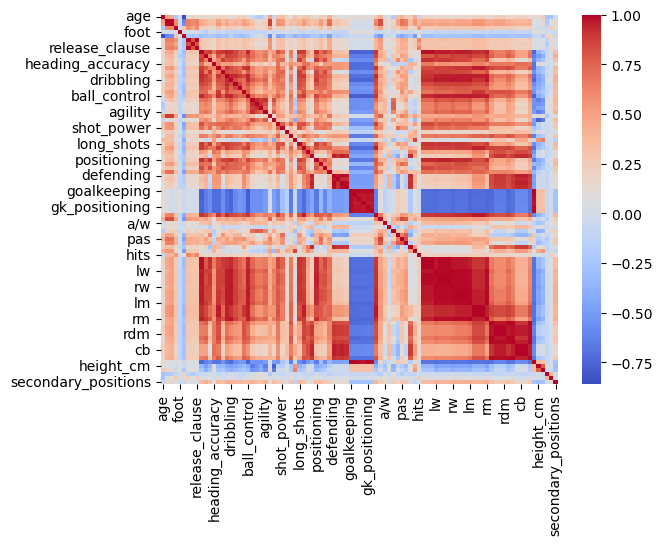

In [30]:
#visually presenting correlation matrix
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [31]:
#deleting columns thay have correlation higher than 0.7 with each other
high_corr_cols = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.70:
            colname = correlation_matrix.columns[i]
            high_corr_cols.add(colname)

In [32]:
#deleting columns thay have correlation higher than 0.7 with each other
raw_data = raw_data.drop(columns=high_corr_cols)

raw_data.head()

,name,age,ova,nationality,club,bp,pot,foot,joined,loan_date_end,value,attacking,jumping,strength,a/w,d/w,hits,contract_start,contract_end,secondary_positions
0,G. Pasquale,33,69,Italy,Udinese,LWB,69,0,2008-07-01,2021-06-30,625000.0,313,68.0,68,2,3,4,2008,2016,1
1,Luis García,37,71,Spain,KAS Eupen,CM,71,1,2014-07-19,2021-06-30,600000.0,337,54.0,60,2,2,4,2014,2019,3
2,J. Cole,33,71,England,Coventry City,CAM,71,1,2016-01-07,2021-06-30,1100000.0,337,58.0,56,2,1,11,2016,2020,4
4,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,1,2018-07-16,2021-06-30,5500000.0,367,40.0,62,3,2,149,2018,2021,2
5,D. Odonkor,27,66,Germany,Alemannia Aachen,RW,70,1,2011-01-01,2021-06-30,725000.0,271,70.0,61,2,2,7,2011,2012,2


### Standardizing data

In [33]:
X_num = raw_data.select_dtypes(include=(np.number, 'datetime'))
X_cat = raw_data.select_dtypes(include=np.object)

X_num.info()
X_cat.info()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15594 entries, 0 to 17124
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   age                  15594 non-null  int64         
 1   ova                  15594 non-null  int64         
 2   pot                  15594 non-null  int64         
 3   foot                 15594 non-null  int64         
 4   joined               15594 non-null  datetime64[ns]
 5   loan_date_end        15594 non-null  datetime64[ns]
 6   value                15594 non-null  float64       
 7   attacking            15594 non-null  int64         
 8   jumping              15594 non-null  float64       
 9   strength             15594 non-null  int64         
 10  a/w                  15594 non-null  int64         
 11  d/w                  15594 non-null  int64         
 12  hits                 15594 non-null  Int64         
 13  contract_start       15594 non-

/var/folders/7c/c36qrzr96cj9wm_593g20t8000w3sp/T/ipykernel_2935/2034752295.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = raw_data.select_dtypes(include=np.object)


/Users/jbadenes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


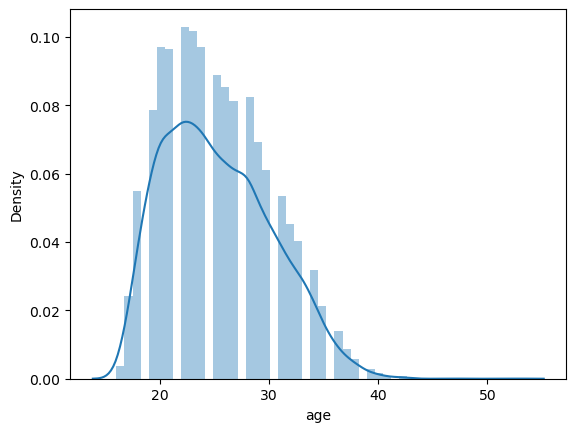

/Users/jbadenes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


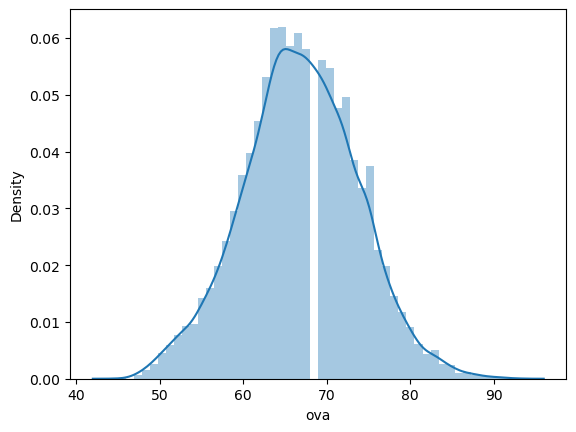

/Users/jbadenes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


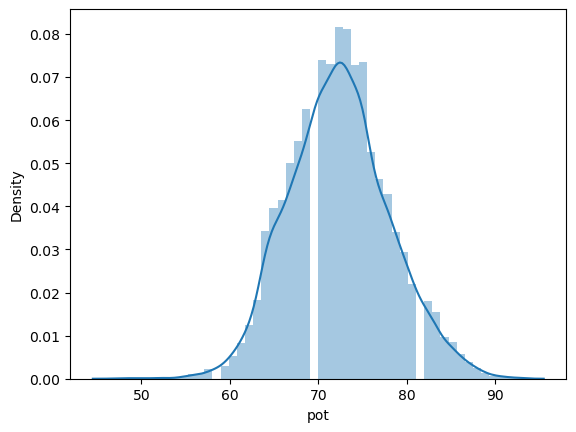

/Users/jbadenes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


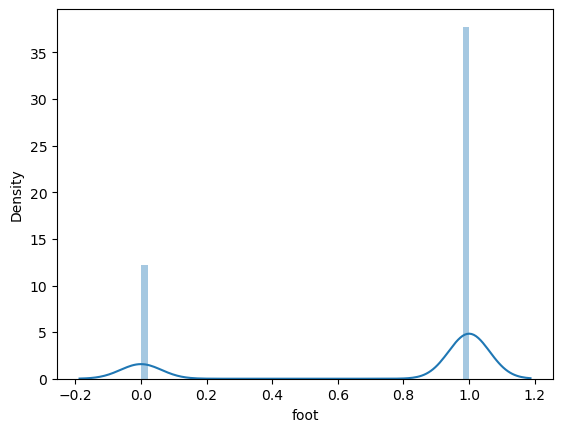

/Users/jbadenes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


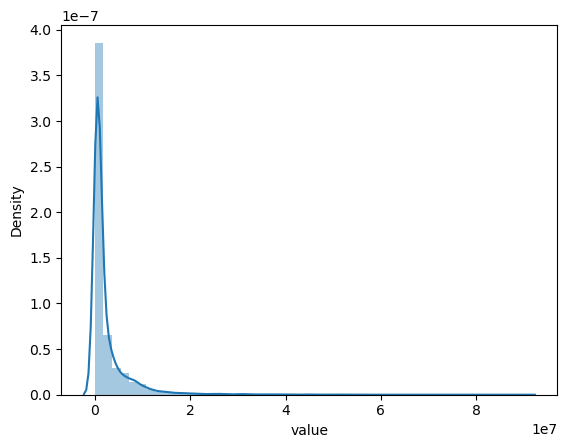

/Users/jbadenes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


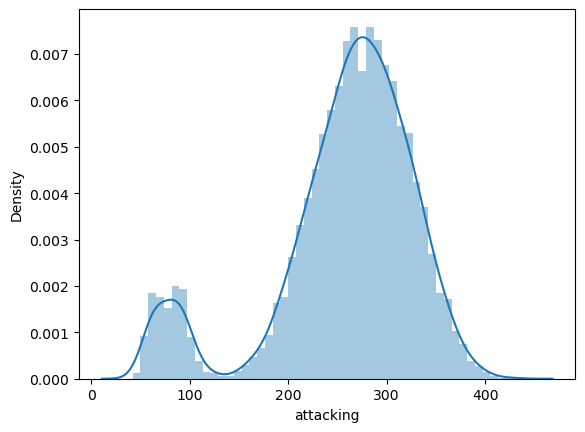

/Users/jbadenes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


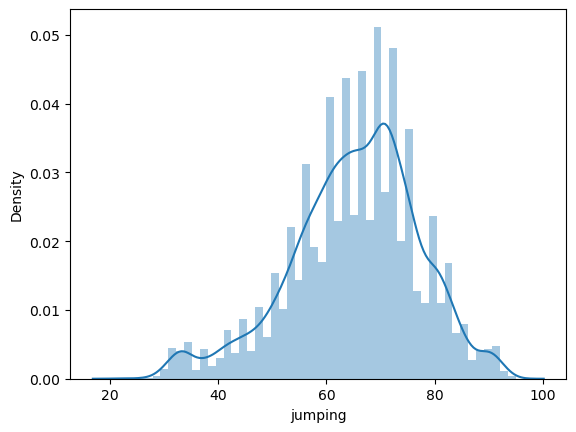

/Users/jbadenes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


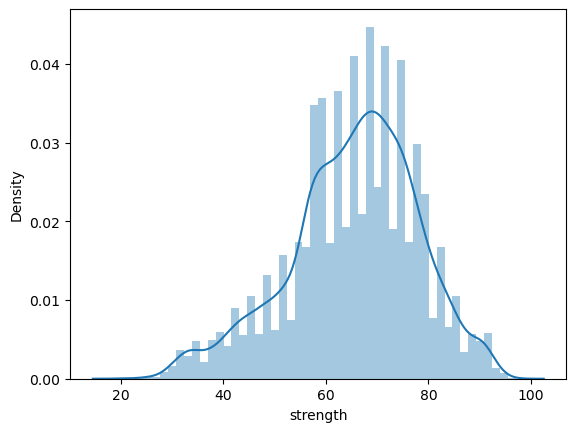

/Users/jbadenes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


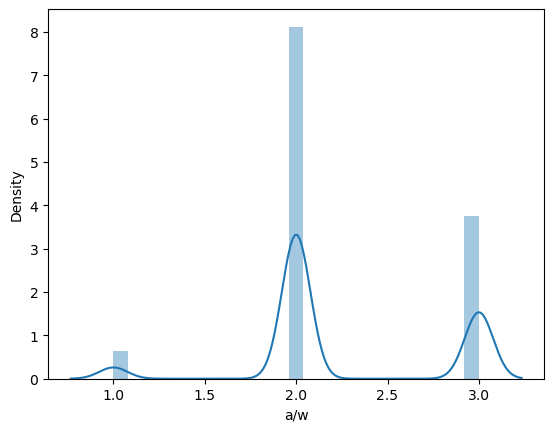

/Users/jbadenes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


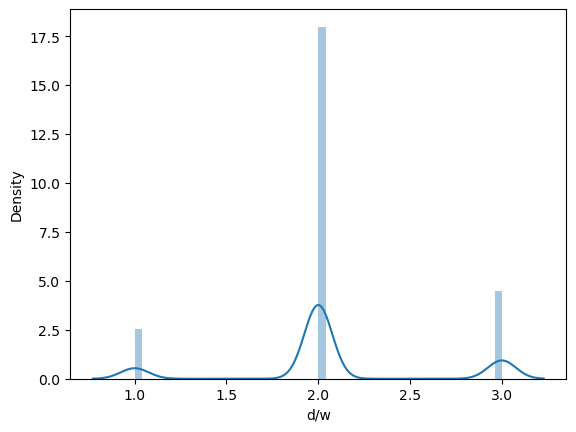

/Users/jbadenes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


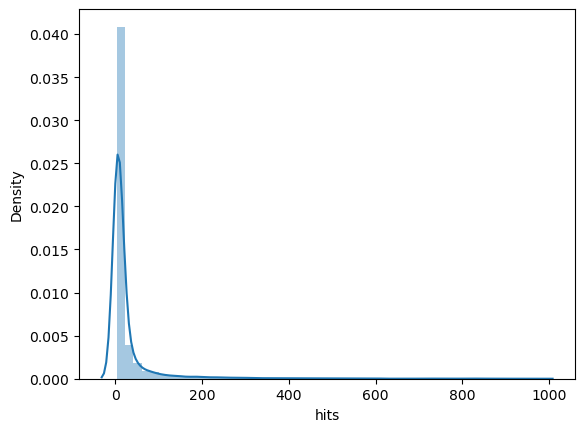

/Users/jbadenes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


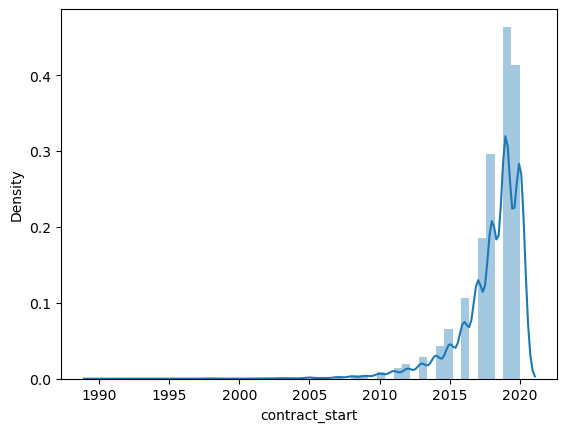

/Users/jbadenes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


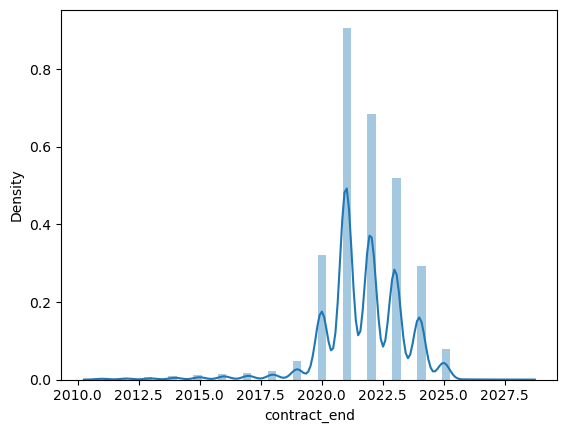

/Users/jbadenes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


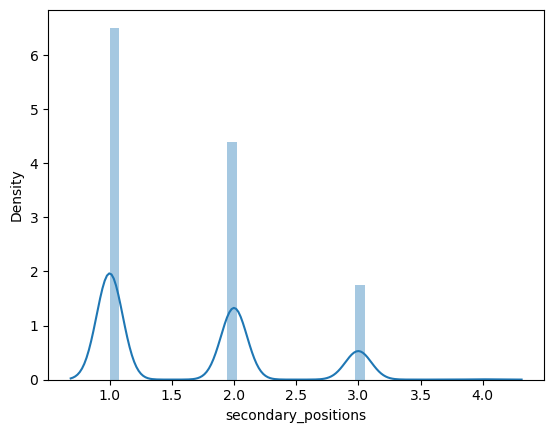

In [34]:
for col in X_num.select_dtypes(include=np.number).columns:
    sns.distplot(X_num[col])
    plt.show()

In [35]:
cols_to_standardize = ['age', 'ova', 'pot', 'attacking', 'jumping', 'strength', 'hits']

scaler = StandardScaler()

X_num[cols_to_standardize] = scaler.fit_transform(X_num[cols_to_standardize])

### Dummifying categoricals

In [46]:
cat_cols = [col for col in X_cat.columns if 'name' not in col]
X_cat_filtered = X_cat[cat_cols]
X_cat_dummies = pd.get_dummies(X_cat_filtered, drop_first=True)

X_cat_dummies

nationality_Albania  nationality_Algeria  nationality_Andorra  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
4                        0                    0                    0   
5                        0                    0                    0   
...                    ...                  ...                  ...   
17119                    0                    0                    0   
17121                    0                    0                    0   
17122                    0                    0                    0   
17123                    0                    0                    0   
17124                    0                    0                    0   

       nationality_Angola  nationality_Antigua &amp; Barbuda  \
0                       0                                  0   
1                       0                                  0   
2                       0                                  0   
4                       0                                  0   
5                       0                                  0   
...                   ...                                ...   
17119                   0                                  0   
17121                   0                                  0   
17122                   0                                  0   
17123                   0                                  0   
17124                   0                                  0   

       nationality_Argentina  nationality_Armenia  nationality_Aruba  \
0                          0                    0                  0   
1                          0                    0                  0   
2                          0                    0                  0   
4                          0                    0                  0   
5                          0                    0                  0   
...                      ...                  ...                ...   
17119                      0                    0                  0   
17121                      0                    0                  0   
17122                      0                    0                  0   
17123                      0                    0                  0   
17124                      0                    0                  0   

       nationality_Australia  nationality_Austria  nationality_Azerbaijan  \
0                          0                    0                       0   
1                          0                    0                       0   
2                          0                    0                       0   
4                          0                    0                       0   
5                          0                    0                       0   
...                      ...                  ...                     ...   
17119                      0                    0                       0   
17121                      0                    0                       0   
17122                      0                    0                       0   
17123                      0                    0                       0   
17124                      0                    0                       0   

       nationality_Barbados  nationality_Belarus  nationality_Belgium  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
4                         0                    0                    0   
5                         0                    0                    0   
...                     ...                  ...                  ...   
17119                     0                    0                    0   

### Running the model

In [37]:
y = X_num['value']
X = np.concatenate((X_num[['age', 'ova', 'pot', 'foot', 'attacking', 'jumping', 'strength', 'a/w', 'd/w', 'hits', 'contract_start', 'contract_end']], X_cat_dummies), axis=1)
final_data = np.concatenate((X_num, X_cat), axis=1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [57]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [58]:
predictions = model.predict(X_test)
predictions.shape

(4679,)

In [59]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(-3.243060312183963e+19, 2.9353692071666816e+16, 8.616392382382353e+32)

In [60]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  -3.243060312183963e+19
RMSE =  2.9353692071666816e+16
MSE =  8.616392382382353e+32


### Finding the most undervalued players

In [43]:
predictions = pd.Series(predictions)
predictions.reset_index(drop=True, inplace=True)
final_columns = X_num.columns.append(X_cat.columns)
final_data = pd.DataFrame(np.concatenate((X_num, X_cat), axis=1), columns=final_columns)
final_data = final_data.reset_index(drop=True)
final_data = pd.concat([final_data, predictions], axis=1)
final_data['value'] = pd.to_numeric(final_data['value'], errors='coerce')
final_data.dropna(inplace=True)
final_data[0] = pd.to_numeric(final_data[0], errors='coerce')
final_data.dropna(inplace=True)
final_data['diff'] = final_data['value'] - final_data[0]

In [48]:
final_data.sort_values('diff', inplace=True)

final_data.head(10)

,age,ova,pot,foot,joined,loan_date_end,value,attacking,jumping,strength,a/w,d/w,hits,contract_start,contract_end,secondary_positions,name,nationality,club,bp,0,diff
616,1.351036,1.184811,0.467261,1,2014-01-10,2021-06-30,4400000.0,1.104295,-2.694131,0.687139,2,2,0.048815,2014,2020,2,M. Bradley,United States,Toronto FC,CDM,9.927909e+17,-9.927909e+17
3280,0.54475,1.184811,0.467261,1,2015-08-12,2021-06-30,6000000.0,-0.208667,-0.016921,1.083935,1,3,0.074229,2015,2021,2,Oriol Romeu,Spain,Southampton,CDM,9.927909e+17,-9.927909e+17
2106,1.754179,-0.413354,-1.462047,0,2016-01-22,2021-06-30,160000.0,0.275056,0.150404,0.131624,3,2,-0.332388,2016,2022,1,Fábinho,Brazil,Philadelphia Union,CDM,3.020117e+17,-3.020117e+17
4013,0.746321,0.167797,-0.76048,1,2020-06-14,2021-06-30,875000.0,0.510007,0.736044,-0.503249,2,2,-0.294268,2020,2024,3,M. Barreto,France,AC Ajaccio,RM,2.899866e+17,-2.899866e+17
4140,1.149464,-0.268066,-1.286655,1,2020-08-13,2021-06-30,400000.0,0.247415,1.572672,0.687139,3,2,-0.319681,2020,2021,1,D. Zbozień,Poland,Wisła Płock,RB,2.899866e+17,-2.899866e+17
730,1.552607,-0.122778,-1.111263,1,2019-07-13,2021-06-30,325000.0,0.496187,-2.777794,0.131624,1,1,-0.319681,2019,2021,2,Abraham González,Spain,Tiburones Rojos de Veracruz,CM,2.538829e+17,-2.538829e+17
3893,-0.059965,0.167797,-0.409697,1,2010-01-01,2021-06-30,875000.0,-2.447613,-0.769887,0.210983,2,2,-0.332388,2010,2018,1,Santos,Brazil,Club Athletico Paranaense,GK,2.538829e+17,-2.538829e+17
1150,1.552607,-0.703929,-1.81283,1,2020-01-02,2021-06-30,180000.0,0.247415,-2.610469,1.083935,2,3,-0.281561,2020,2021,2,T. Diagouraga,France,Morecambe,CDM,1.867886e+17,-1.867886e+17
3203,0.343178,0.748948,-0.058914,0,2018-07-05,2021-06-30,3300000.0,0.496187,0.150404,-2.249152,3,1,0.696861,2018,2021,2,J. Iturbe,Paraguay,U.N.A.M.,RM,1.462742e+17,-1.462742e+17
516,0.343178,1.184811,0.642653,0,2016-07-01,2021-06-30,7500000.0,0.634393,-0.351573,1.322012,2,3,-0.040132,2016,2021,1,Vesga,Spain,Athletic Club de Bilbao,CDM,1.462742e+17,-1.462742e+17
